# FlightDelay

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress

In [2]:
flight_data_df = pd.read_csv("data/T_ONTIME_REPORTING.csv")
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flight_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538837 entries, 0 to 538836
Data columns (total 71 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MONTH                    538837 non-null  int64  
 1   DAY_OF_MONTH             538837 non-null  int64  
 2   DAY_OF_WEEK              538837 non-null  int64  
 3   FL_DATE                  538837 non-null  object 
 4   OP_UNIQUE_CARRIER        538837 non-null  object 
 5   ORIGIN_AIRPORT_ID        538837 non-null  int64  
 6   ORIGIN_AIRPORT_SEQ_ID    538837 non-null  int64  
 7   ORIGIN_CITY_MARKET_ID    538837 non-null  int64  
 8   ORIGIN                   538837 non-null  object 
 9   ORIGIN_CITY_NAME         538837 non-null  object 
 10  ORIGIN_STATE_ABR         538837 non-null  object 
 11  ORIGIN_STATE_FIPS        538837 non-null  int64  
 12  ORIGIN_STATE_NM          538837 non-null  object 
 13  ORIGIN_WAC               538837 non-null  int64  
 14  DEST

In [4]:
flight_data_df.shape

(538837, 71)

In [5]:
flight_data_df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST

In [6]:
flight_data_df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,...,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF
count,538837.0,538837.000000,538837.000000,538837.000000,5.388370e+05,538837.000000,538837.000000,538837.000000,538837.000000,5.388370e+05,...,1345.000000,1121.000000,1121.000000,1345.000000,1443.000000,1.443000e+03,1443.000000,1443.000000,1443.000000,1135.000000
mean,1.0,16.095398,3.890269,12653.203128,1.265324e+06,31748.240980,26.713025,54.355763,12653.175350,1.265321e+06,...,0.833457,437.040143,292.958965,38.810409,12707.566182,1.270760e+06,1374.341649,35.939709,27.994456,1453.559471
std,0.0,8.929168,2.076230,1524.197257,1.524195e+05,1310.151761,16.676881,26.919824,1524.146385,1.524145e+05,...,0.372706,250.781370,258.788893,178.614061,1524.158696,1.524159e+05,546.036453,39.015571,31.141104,514.619588
min,1.0,1.000000,1.000000,10135.000000,1.013506e+06,30070.000000,1.000000,1.000000,10135.000000,1.013506e+06,...,0.000000,58.000000,4.000000,0.000000,10135.000000,1.013506e+06,1.000000,2.000000,2.000000,3.000000
25%,1.0,8.000000,2.000000,11292.000000,1.129202e+06,30693.000000,12.000000,33.000000,11292.000000,1.129202e+06,...,1.000000,276.000000,143.000000,0.000000,11292.000000,1.129202e+06,1028.500000,15.000000,11.000000,1123.000000
50%,1.0,16.000000,4.000000,12889.000000,1.288904e+06,31454.000000,26.000000,44.000000,12889.000000,1.288904e+06,...,1.000000,361.000000,203.000000,0.000000,12889.000000,1.288904e+06,1334.000000,24.000000,17.000000,1444.000000
75%,1.0,24.000000,6.000000,14027.000000,1.402702e+06,32467.000000,41.000000,82.000000,14027.000000,1.402702e+06,...,1.000000,498.000000,315.000000,0.000000,14057.000000,1.405702e+06,1841.000000,41.000000,31.000000,1827.500000
max,1.0,31.000000,7.000000,16869.000000,1.686902e+06,35991.000000,78.000000,93.000000,16869.000000,1.686902e+06,...,1.000000,1733.000000,1538.000000,2556.000000,15919.000000,1.591905e+06,2400.000000,353.000000,260.000000,2400.000000


In [7]:
data = flight_data_df[['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','DIV_ARR_DELAY']]
headers = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','DIV_ARR_DELAY']
df1 = pd.DataFrame(data, columns=headers)
df1.head()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ARR_DELAY
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,83.0,2.0,0.0,342.0,NaN
4,11.0,0.0,0.0,0.0,61.0,NaN


In [8]:
def airline_abbreviation_to_name(x): 
    airline_abb = {
        "WN" : "Southwest Airlines",
        "DL" : "Delta Airlines",
        "AA" : "American Airlines",
        "UA" : "United Airlines",
        "OO" : "SkyWest Airlines Inc.",
        "YX" : "Republic Airline",
        "B6" : "JetBlue Airways",
        "NK" : "Spirit Airlines",
        "AS" : "Alaska Airlines",
        "MQ" : "Envoy Air",
        "9E" : "Endeavor Air Inc.",
        "OH" :    "PSA Airlines Inc.",
        "F9" : "Frontier Airlines",
        "G4" : "Allegiant Air",
        "HA" : "Hawaiian Airlines"
    }
    for key, value in airline_abb.items():
        if x == key:
            x = value
    return x

flight_data_df["Airline"] = flight_data_df["OP_UNIQUE_CARRIER"].apply(airline_abbreviation_to_name)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.


In [9]:
airlines=flight_data_df.Airline.unique()
len(airlines)

15

In [10]:
value=flight_data_df.Airline.value_counts()
value

Airline
Southwest Airlines       112430
Delta Airlines            75174
American Airlines         74999
United Airlines           56657
SkyWest Airlines Inc.     50347
Republic Airline          24476
JetBlue Airways           23249
Spirit Airlines           21876
Alaska Airlines           19801
Envoy Air                 18849
Endeavor Air Inc.         16926
PSA Airlines Inc.         15456
Frontier Airlines         13285
Allegiant Air              8615
Hawaiian Airlines          6697
Name: count, dtype: int64

In [11]:
flight_data_df['DEP_TIME'] = flight_data_df.DEP_TIME.map("{:04}".format)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.


In [12]:
flight_data_df['DEP_TIME'] =flight_data_df['DEP_TIME'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.


In [13]:
flight_data_df['DEP_TIME'] = flight_data_df.DEP_TIME.replace(to_replace ='24:00', value = '00:00', regex = True)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.


In [14]:
flight_data_df.DEP_TIME[268503]

'12:39.0'

In [15]:
flight_data_df['DepTimeStamp']=np.nan

In [16]:
flight_data_df['DepTimeStamp'] = flight_data_df.FL_DATE.map(str) + " " + flight_data_df.DEP_TIME
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline,DepTimeStamp
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 0:00 60:1.0
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 0:00 72:4.0
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 0:00 12:45.0
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 0:00 18:55.0
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 0:00 19:19.0


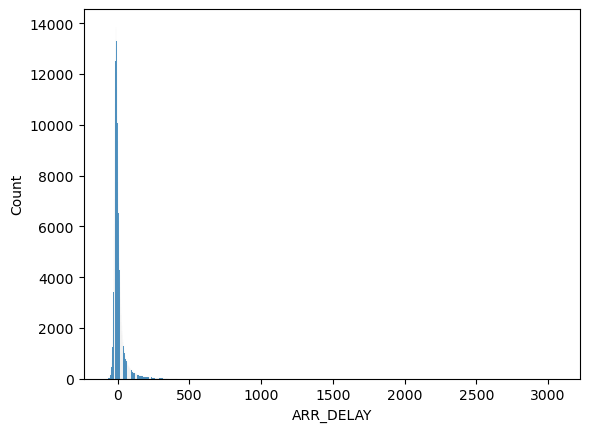

In [17]:
sns.histplot(flight_data_df['ARR_DELAY'], )
rcParams['figure.figsize'] = 11,8
plt.savefig("data/Fig1.png")
plt.show()

In [18]:
print("Skewness: %f" % flight_data_df['ARR_DELAY'].skew())
print("Kurtosis: %f" % flight_data_df['ARR_DELAY'].kurt())

Skewness: 9.855217
Kurtosis: 190.858695


The data reveals a closely grouped distribution, with the peak exhibiting greater height than width. This implies that most delays are brief in duration. Conversely, a minority of delays stand out for their longer durations compared to the predominant short-term delays.

In [19]:
min_value = flight_data_df.ARR_DELAY.min()
min_value

-80.0

In [20]:
max_value = flight_data_df.ARR_DELAY.max()
max_value

3063.0

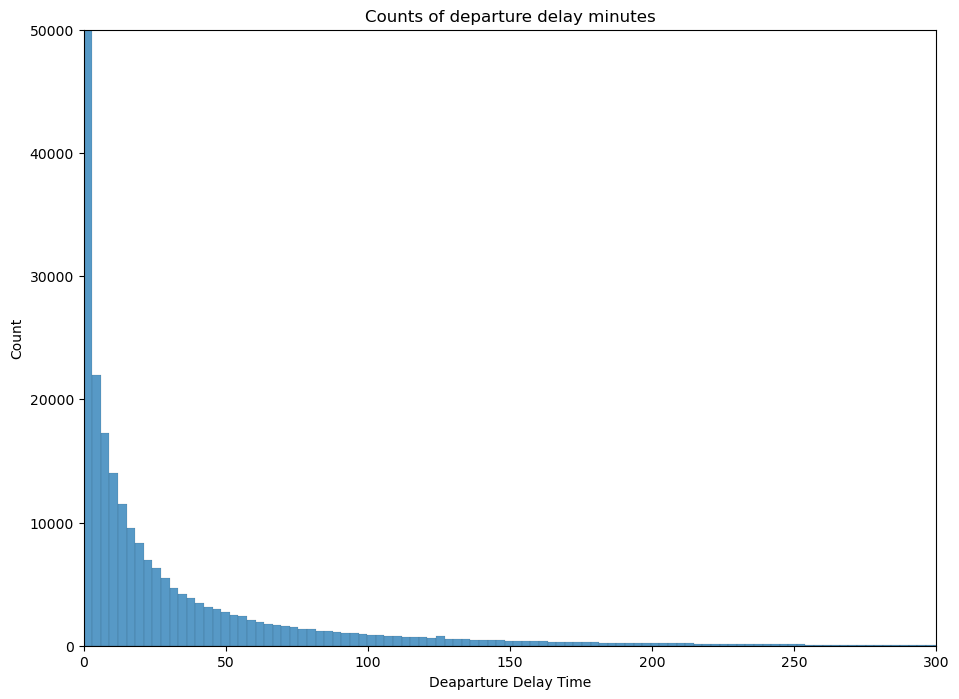

In [21]:
# The distribution of the delay minutes
sns.histplot(data = flight_data_df, x = "DEP_DELAY_NEW", bins = 1000)
plt.xlim(left = 0, right = 300)
plt.ylim(bottom = 0, top = 50000)
plt.title("Counts of departure delay minutes")
plt.xlabel("Deaparture Delay Time")
plt.savefig("data/Fig2.png")
plt.show()


In [22]:
flight_data_df["DEP_DELAY_NEW"].value_counts()

DEP_DELAY_NEW
0.0       326076
1.0        11573
2.0         9682
3.0         8685
4.0         7894
           ...  
1691.0         1
667.0          1
976.0          1
1199.0         1
682.0          1
Name: count, Length: 1065, dtype: int64

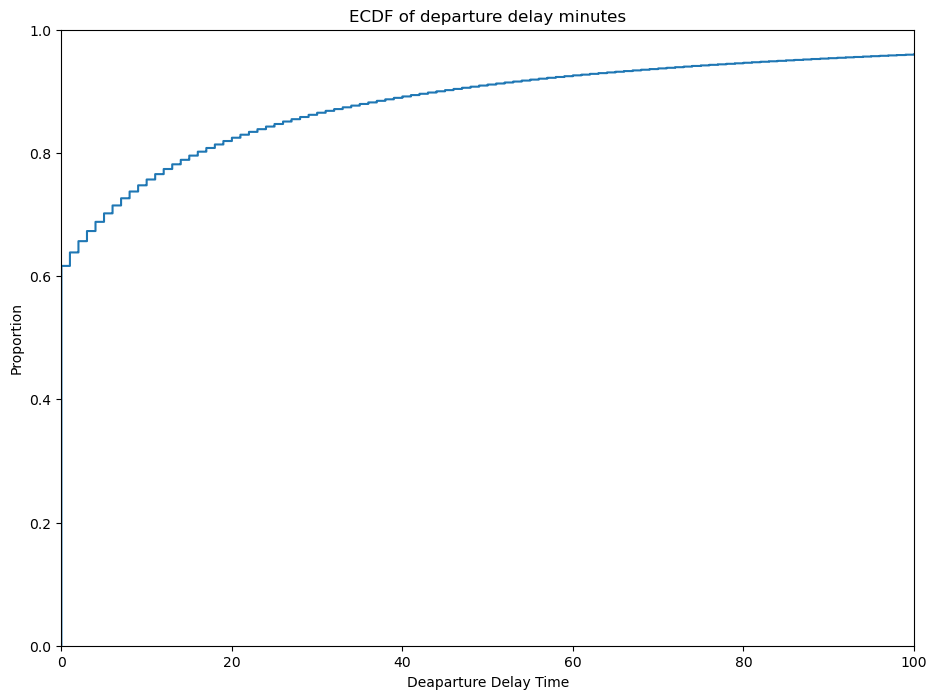

In [23]:
sns.ecdfplot(data = flight_data_df, x = "DEP_DELAY_NEW")
plt.xlim(left = 0, right = 100)
plt.title("ECDF of departure delay minutes")
plt.xlabel("Deaparture Delay Time")
plt.savefig("data/Fig3.png")

In terms of departure delay times, there are 326,076 flights experiencing no delay, and an additional 11,573 flights with just a 1-minute delay. To enhance readability, the histogram's y-limit is set at 360,000, revealing a right-skewed distribution. This skew suggests that the majority of flight delay times are on the lower end.

Analyzing the ECDF plot with an x-limit of 100, we observe that more than 70% of flights experience no delay, and 95% of flights have delays less than 100 minutes. This indicates that our focus should be on addressing issues causing shorter delay times.

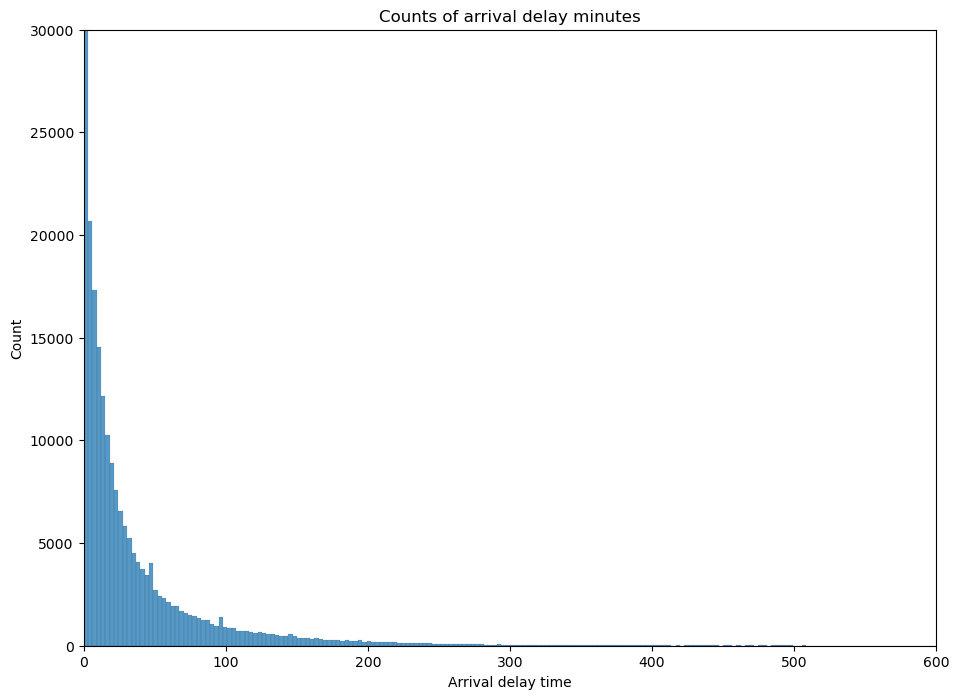

In [24]:
sns.histplot(data = flight_data_df, x = "ARR_DELAY_NEW", bins = 1000)
plt.xlim(left = 0, right = 600)
plt.ylim(bottom = 0, top = 30000)
plt.title("Counts of arrival delay minutes")
plt.xlabel("Arrival delay time")
plt.savefig("data/Fig4.png")
plt.show()

In [25]:
flight_data_df["ARR_DELAY_NEW"].value_counts()

ARR_DELAY_NEW
0.0       324622
1.0         8782
2.0         8377
3.0         7763
4.0         7310
           ...  
666.0          1
625.0          1
1206.0         1
1686.0         1
677.0          1
Name: count, Length: 1062, dtype: int64

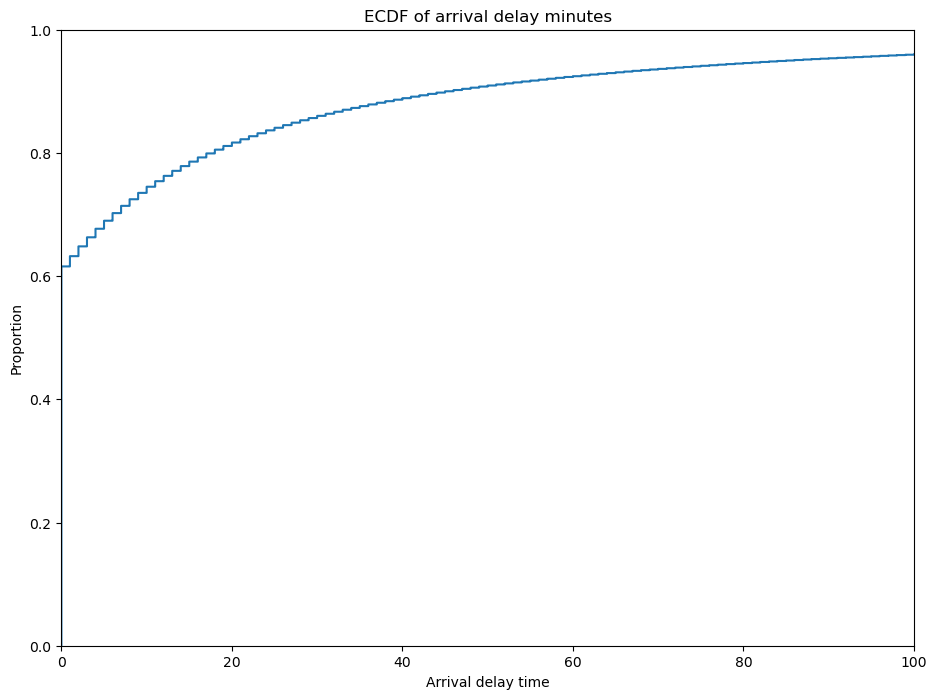

In [26]:
sns.ecdfplot(data = flight_data_df, x = "ARR_DELAY_NEW")
plt.xlim(left = 0, right = 100)
plt.title("ECDF of arrival delay minutes")
plt.xlabel("Arrival delay time")
plt.savefig("data/Fig5.png")

In terms of arrival delay times, there are 324,622 flights experiencing no delay, and the second-highest number of delays, amounting to 15 minutes, is observed in 600 flights. To enhance readability, the histogram's y-limit is set at 30,000, revealing a right-skewed distribution—indicating that the majority of flight delay times are on the lower end.

Examining the ECDF plot with an x-limit of 100, it becomes evident that nearly 80% of flights experience no delay, and there is a notable absence of flights with arrival delay times falling between 1 to 15 minutes.

# Which airport has the most delaied?

### Departure Delay

In [27]:
df_the_most_delaied_city_dp = flight_data_df.groupby("ORIGIN_CITY_NAME")["DEP_DELAY_NEW"]\
.describe().sort_values("mean", ascending = False).head(10)

df_the_most_delaied_city_dp

,count,mean,std,min,25%,50%,75%,max
ORIGIN_CITY_NAME,,,,,,,,
"Riverton/Lander, WY",30.0,69.066667,170.907302,0.0,0.0,0.0,18.50,826.0
"Pellston, MI",49.0,67.714286,225.781052,0.0,0.0,0.0,26.00,1222.0
"North Bend/Coos Bay, OR",17.0,52.000000,75.030827,0.0,3.0,11.0,118.00,218.0
"Prescott, AZ",60.0,47.466667,94.192098,0.0,0.0,0.0,35.25,347.0
"Jackson, WY",501.0,46.361277,135.090900,0.0,0.0,11.0,45.00,1744.0
"Clarksburg/Fairmont, WV",10.0,45.700000,73.347044,0.0,0.0,4.0,59.50,207.0
"Escanaba, MI",58.0,45.327586,150.027177,0.0,0.0,0.0,1.75,944.0
"North Platte, NE",69.0,44.855072,119.806004,0.0,0.0,0.0,16.00,726.0
"Texarkana, AR",87.0,44.620690,169.580141,0.0,0.0,0.0,0.00,1441.0


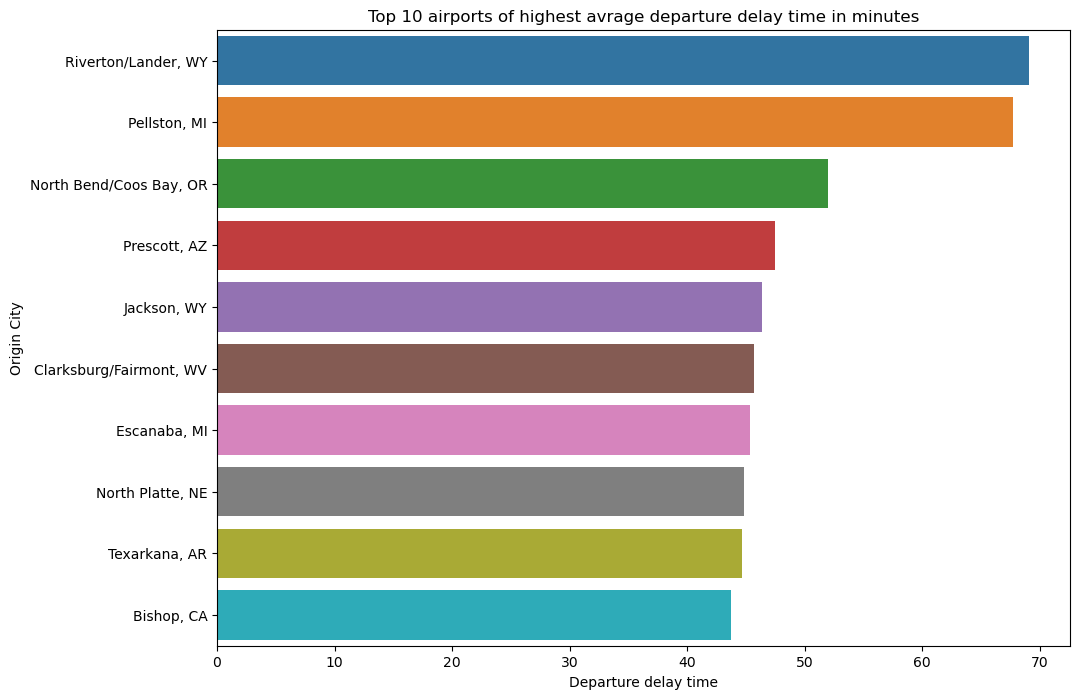

In [28]:
# Plot the average departure delay minutes in each airport
sns.barplot(data = df_the_most_delaied_city_dp, x = "mean",\
            y = df_the_most_delaied_city_dp.index, errorbar = None)
plt.title("Top 10 airports of highest avrage departure delay time in minutes")
plt.ylabel("Origin City")
plt.xlabel("Departure delay time")
plt.savefig("data/Fig6.png")

### Depature delay without outliers

In [29]:
def outlier_stat(serise):
    if isinstance(serise, pd.Series):
        Q1 = serise.quantile(0.25)
        Q3 = serise.quantile(0.75)
        IQR = Q3 - Q1
        higher_bond = Q3 + 1.5 * IQR
        lower_bond = Q1 - 1.5 * IQR
        return Q1, Q3, IQR,lower_bond, higher_bond
    else:
        raise TypeError("The argument passed in is not pandas serise")

In [30]:
Q1, Q3, IQR,lower_bond, higher_bond = outlier_stat(flight_data_df["DEP_DELAY_NEW"])
df_dep_delay_without_outli = flight_data_df[(flight_data_df["DEP_DELAY_NEW"] > lower_bond) & (flight_data_df["DEP_DELAY_NEW"] < higher_bond)]
df_dep_delay_without_outli = df_dep_delay_without_outli.groupby("ORIGIN_CITY_NAME")["DEP_DELAY_NEW"]\
.describe().sort_values("mean", ascending = False).head(10)

df_dep_delay_without_outli

,count,mean,std,min,25%,50%,75%,max
ORIGIN_CITY_NAME,,,,,,,,
"North Bend/Coos Bay, OR",12.0,7.500000,8.185353,0.0,0.0,5.5,11.75,24.0
"Niagara Falls, NY",18.0,6.000000,5.687965,0.0,0.0,6.0,10.50,17.0
"Plattsburgh, NY",28.0,6.000000,7.654580,0.0,0.0,1.5,12.25,21.0
"Cody, WY",2.0,6.000000,8.485281,0.0,3.0,6.0,9.00,12.0
"Pago Pago, TT",6.0,5.166667,7.167054,0.0,0.5,3.0,5.50,19.0
"Jackson, WY",324.0,4.743827,7.038536,0.0,0.0,0.0,9.25,24.0
"Joplin, MO",42.0,4.547619,7.526222,0.0,0.0,0.0,11.50,21.0
"Ashland, WV",19.0,4.421053,6.954741,0.0,0.0,0.0,6.50,22.0
"Denver, CO",16861.0,4.328510,6.481287,0.0,0.0,0.0,7.00,24.0


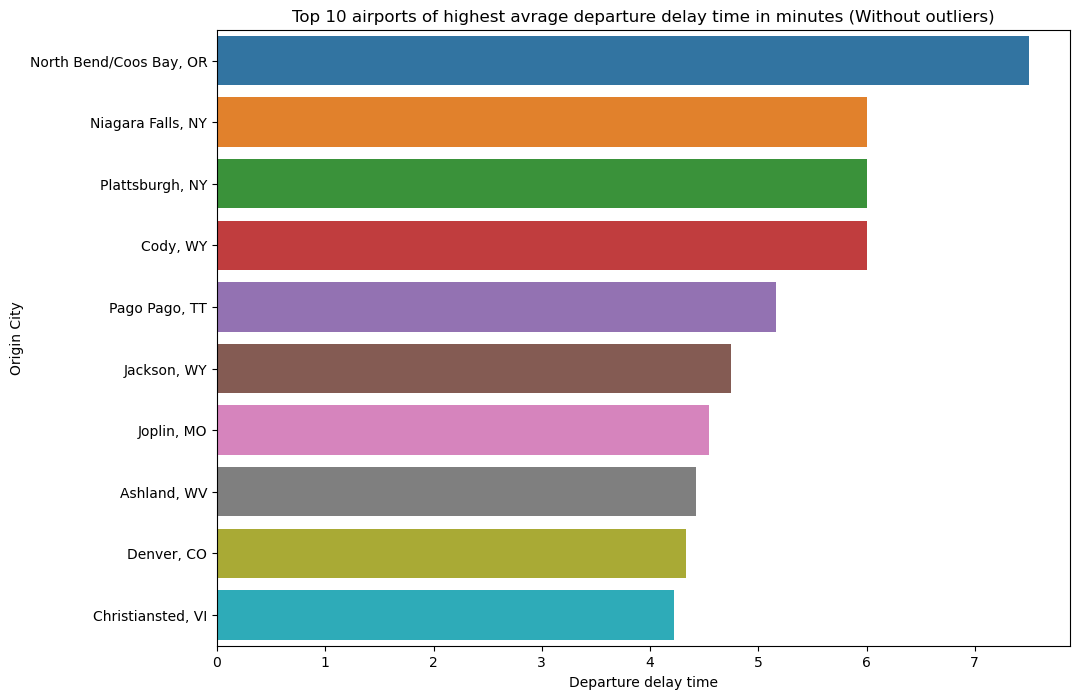

In [31]:
# Plot the average departure delay minutes in each airport without outliers
sns.barplot(data = df_dep_delay_without_outli, x = "mean",\
            y = df_dep_delay_without_outli.index, errorbar = None)
plt.title("Top 10 airports of highest avrage departure delay time in minutes (Without outliers)")
plt.ylabel("Origin City")
plt.xlabel("Departure delay time")
plt.savefig("data/Fig7.png")

### Arrival Delay

In [32]:
# The airport with the most delay minutes
df_the_most_delaied_city_ar = flight_data_df.groupby("DEST_CITY_NAME")["ARR_DELAY_NEW"]\
.describe().sort_values("mean", ascending = False).head(10)

df_the_most_delaied_city_ar

,count,mean,std,min,25%,50%,75%,max
DEST_CITY_NAME,,,,,,,,
"Grand Forks, ND",116.0,46.672414,188.391534,0.0,0.0,0.0,8.75,1736.0
"Provo, UT",147.0,45.353741,139.662647,0.0,0.0,13.0,33.00,1117.0
"Hancock/Houghton, MI",54.0,38.851852,101.231364,0.0,0.0,5.0,31.00,706.0
"North Platte, NE",69.0,38.492754,106.254083,0.0,0.0,0.0,21.00,744.0
"Punta Gorda, FL",545.0,37.115596,111.017402,0.0,0.0,5.0,34.00,1488.0
"Riverton/Lander, WY",30.0,36.566667,134.791712,0.0,0.0,0.0,13.00,733.0
"Newburgh/Poughkeepsie, NY",53.0,36.283019,101.347342,0.0,0.0,7.0,28.00,706.0
"Aspen, CO",727.0,35.991747,76.879140,0.0,0.0,11.0,40.00,905.0
"North Bend/Coos Bay, OR",17.0,35.705882,57.712395,0.0,0.0,22.0,28.00,213.0


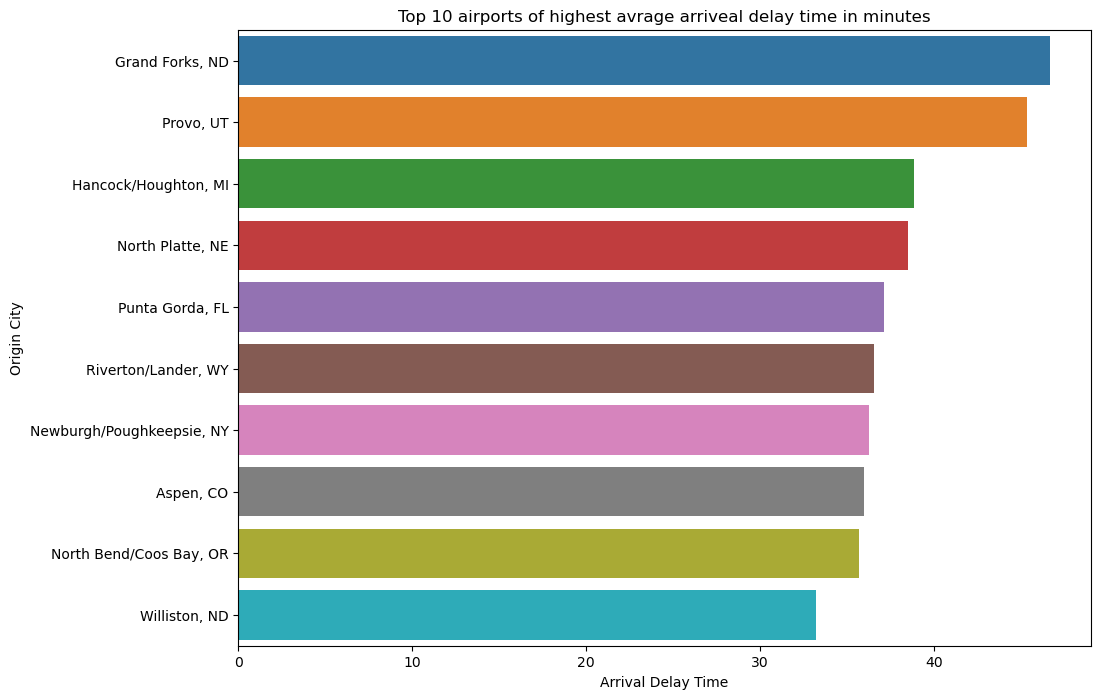

In [33]:
# Plot the average departure delay minutes in each airport
sns.barplot(data = df_the_most_delaied_city_ar, x = "mean",\
            y = df_the_most_delaied_city_ar.index, errorbar = None)
plt.title("Top 10 airports of highest avrage arriveal delay time in minutes")
plt.ylabel("Origin City")
plt.xlabel("Arrival Delay Time")
plt.savefig("data/Fig8.png")

# Which airlines has the most delay?

### Depature Delay

In [34]:
df_airline_dep_delay = flight_data_df.groupby("Airline")["DEP_DELAY_NEW"].describe()\
.sort_values(by = "mean", ascending = False)

df_airline_dep_delay

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Frontier Airlines,12859.0,28.950385,77.016125,0.0,0.0,2.0,31.0,1312.0
Allegiant Air,8503.0,22.737622,84.901127,0.0,0.0,0.0,15.0,1778.0
Spirit Airlines,21369.0,21.427161,52.726012,0.0,0.0,0.0,20.0,1452.0
JetBlue Airways,23067.0,21.021069,59.318173,0.0,0.0,0.0,16.0,1586.0
American Airlines,73632.0,18.094022,73.682098,0.0,0.0,0.0,8.0,3024.0
SkyWest Airlines Inc.,48726.0,17.371793,63.820854,0.0,0.0,0.0,6.0,1662.0
United Airlines,56270.0,17.147752,50.596898,0.0,0.0,0.0,11.0,1363.0
Delta Airlines,74615.0,15.991516,56.171022,0.0,0.0,0.0,9.0,1261.0
Endeavor Air Inc.,16689.0,15.727186,54.457764,0.0,0.0,0.0,3.0,1173.0


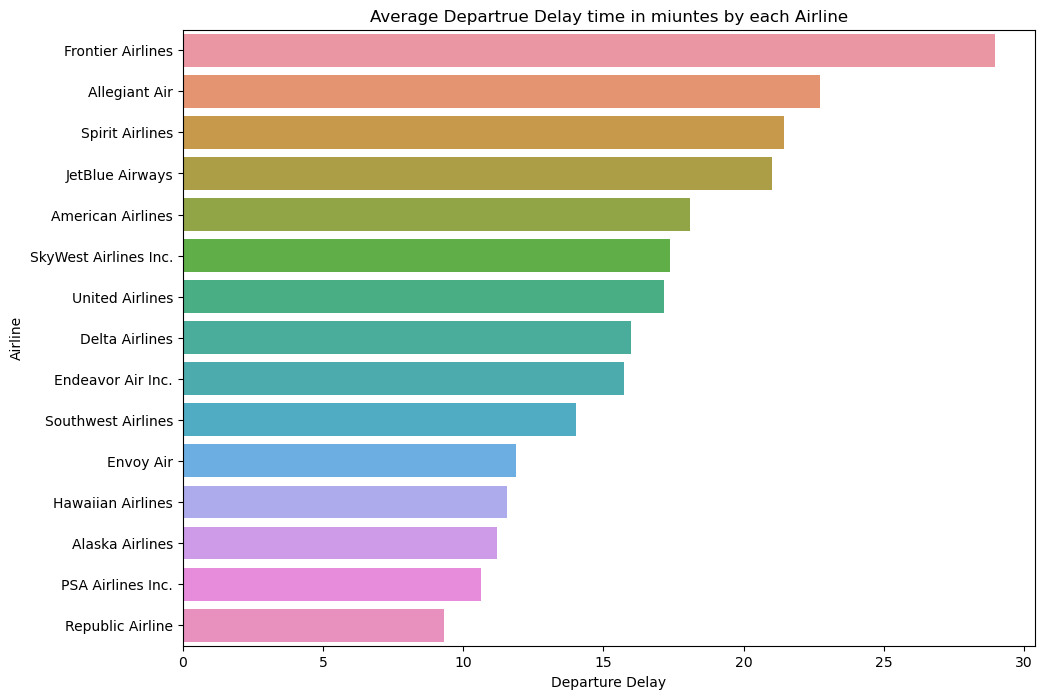

In [35]:
sns.barplot(data = df_airline_dep_delay, x = "mean", y = df_airline_dep_delay.index)
plt.title("Average Departrue Delay time in miuntes by each Airline")
plt.xlabel("Departure Delay")
plt.savefig("data/Fig9.png")

### Arrival Delay

In [36]:
df_airline_arr_delay = flight_data_df.groupby("Airline")["ARR_DELAY_NEW"].describe()\
.sort_values(by = "mean", ascending = False)

df_airline_arr_delay

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Frontier Airlines,12828.0,28.153181,75.991039,0.0,0.0,1.0,30.0,1320.0
Allegiant Air,8478.0,24.117834,85.165400,0.0,0.0,0.0,19.0,1755.0
Spirit Airlines,21348.0,21.376850,52.575596,0.0,0.0,0.0,20.0,1434.0
JetBlue Airways,22978.0,21.030812,59.052398,0.0,0.0,0.0,17.0,1716.0
SkyWest Airlines Inc.,48378.0,19.076791,64.023193,0.0,0.0,0.0,12.0,1653.0
American Airlines,73454.0,18.966768,72.481343,0.0,0.0,0.0,12.0,3063.0
Endeavor Air Inc.,16637.0,17.349402,55.317798,0.0,0.0,0.0,10.0,1216.0
United Airlines,56102.0,17.208192,49.927745,0.0,0.0,0.0,12.0,1363.0
Delta Airlines,74419.0,15.827544,55.182495,0.0,0.0,0.0,9.0,1274.0


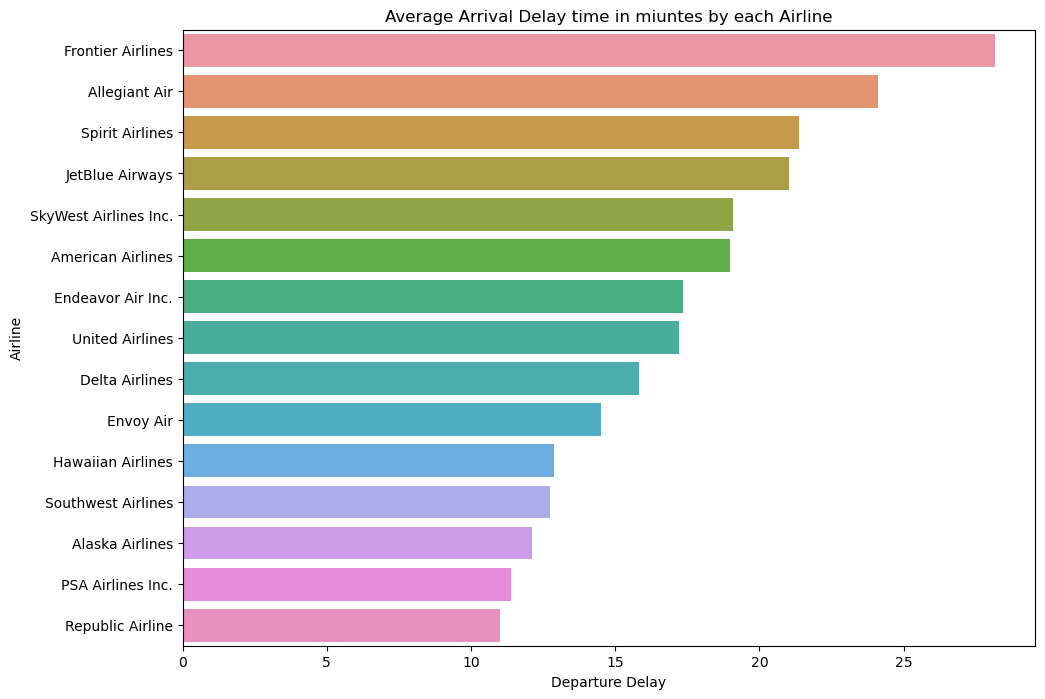

In [37]:
sns.barplot(data = df_airline_arr_delay, x = "mean", y = df_airline_arr_delay.index)
plt.title("Average Arrival Delay time in miuntes by each Airline")
plt.xlabel("Departure Delay")
plt.savefig("data/Fig10.png")

In [38]:
flight_data_df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST

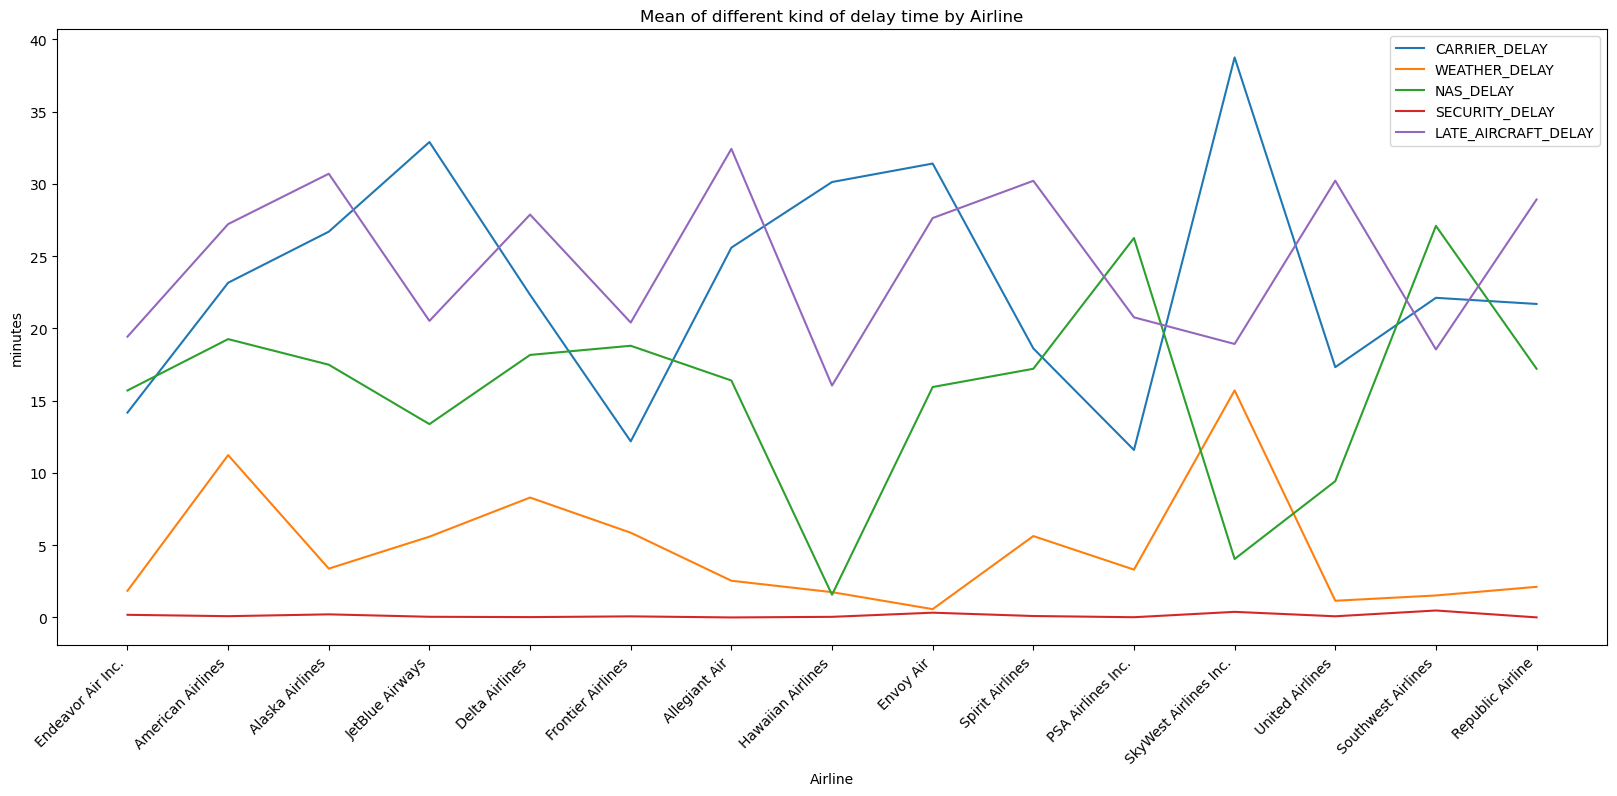

In [39]:
# Mean of each kind of delay groupby airline
fig, ax = plt.subplots(figsize = (20,8)) 
df_airline = flight_data_df[['Airline','CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df_dep_delay_airline = df_airline.groupby("Airline").mean().plot(kind = "line", ax = ax)
ax.set_xticks(range(len(df_airline["Airline"].unique())))
ax.set_xticklabels(df_airline["Airline"].unique(), rotation = 45, ha = "right")
plt.ylabel("minutes")
plt.title("Mean of different kind of delay time by Airline")
plt.savefig("data/Fig11.png")

The weather and securtiy delay of each airline are lower than other kind of delay

# What are the delay on each day of week?

### Arrival Delay

In [40]:
def day_abbreviation_to_name(x): 
    day_of_week = {
        "1": "Monday",
        "2": "Tuesday",
        "3": "Wednesday",
        "4": "Thursday",
        "5": "Friday",
        "6": "Saturday",
        "7": "Sunday",
    }
    return day_of_week.get(str(x), "Unknown")

flight_data_df["day_of_week"] = flight_data_df["DAY_OF_WEEK"].apply(day_abbreviation_to_name)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline,DepTimeStamp,day_of_week
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 0:00 60:1.0,Sunday
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 0:00 72:4.0,Sunday
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 0:00 12:45.0,Sunday
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 0:00 18:55.0,Sunday
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 0:00 19:19.0,Sunday


In [41]:
df_day_of_week_arr = flight_data_df.groupby("day_of_week")["ARR_DELAY_NEW"].describe()\
.sort_values(by = "mean", ascending = False)

df_day_of_week_arr

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Wednesday,65744.0,29.630278,63.943394,0.0,0.0,0.0,31.0,1740.0
Monday,88165.0,18.494334,60.845387,0.0,0.0,0.0,12.0,1877.0
Tuesday,82918.0,15.967474,59.317939,0.0,0.0,0.0,9.0,3063.0
Sunday,85862.0,15.071126,51.758326,0.0,0.0,0.0,11.0,2061.0
Thursday,71654.0,14.754487,49.626881,0.0,0.0,0.0,12.0,2687.0
Friday,72107.0,11.136991,40.098334,0.0,0.0,0.0,7.0,2027.0
Saturday,60747.0,10.036183,41.902519,0.0,0.0,0.0,4.0,2078.0


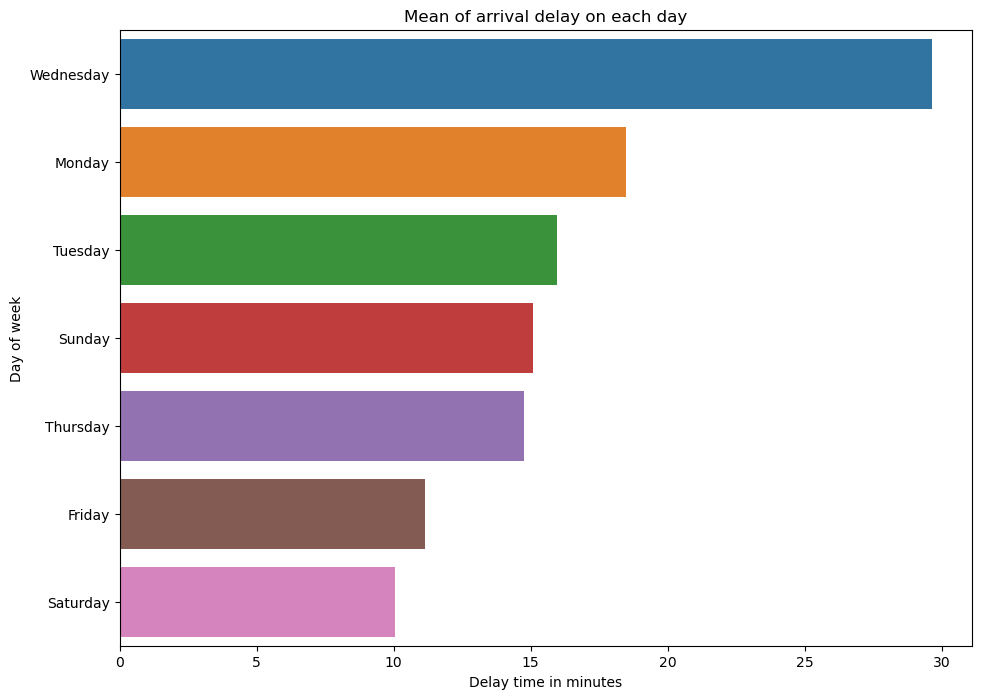

In [42]:
sns.barplot(data = df_day_of_week_arr, x = "mean",\
           y = df_day_of_week_arr.index)
plt.title("Mean of arrival delay on each day")
plt.xlabel("Delay time in minutes")
plt.ylabel("Day of week")
plt.savefig("data/Fig12.png")

### Departure Delay

In [43]:
df_day_of_week_dep = flight_data_df.groupby("day_of_week")["DEP_DELAY_NEW"].describe()\
.sort_values(by = "mean", ascending = False)

df_day_of_week_arr

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Wednesday,65744.0,29.630278,63.943394,0.0,0.0,0.0,31.0,1740.0
Monday,88165.0,18.494334,60.845387,0.0,0.0,0.0,12.0,1877.0
Tuesday,82918.0,15.967474,59.317939,0.0,0.0,0.0,9.0,3063.0
Sunday,85862.0,15.071126,51.758326,0.0,0.0,0.0,11.0,2061.0
Thursday,71654.0,14.754487,49.626881,0.0,0.0,0.0,12.0,2687.0
Friday,72107.0,11.136991,40.098334,0.0,0.0,0.0,7.0,2027.0
Saturday,60747.0,10.036183,41.902519,0.0,0.0,0.0,4.0,2078.0


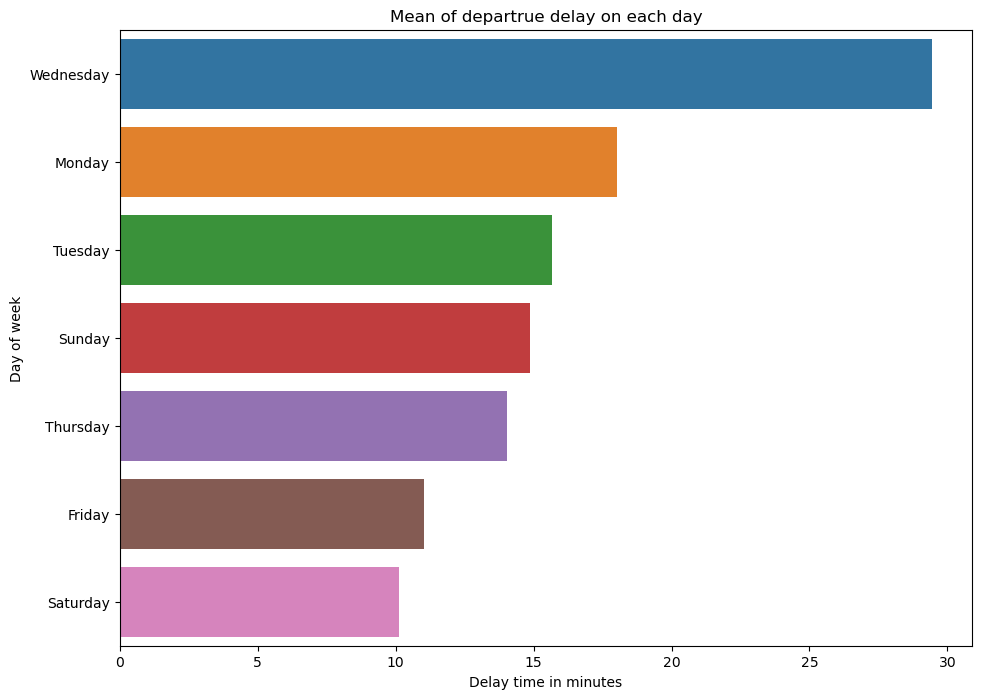

In [44]:
sns.barplot(data = df_day_of_week_dep, x = "mean",\
           y = df_day_of_week_dep.index)
plt.title("Mean of departrue delay on each day")
plt.xlabel("Delay time in minutes")
plt.ylabel("Day of week")
plt.savefig("data/Fig13.png")

# Delay on each day of month

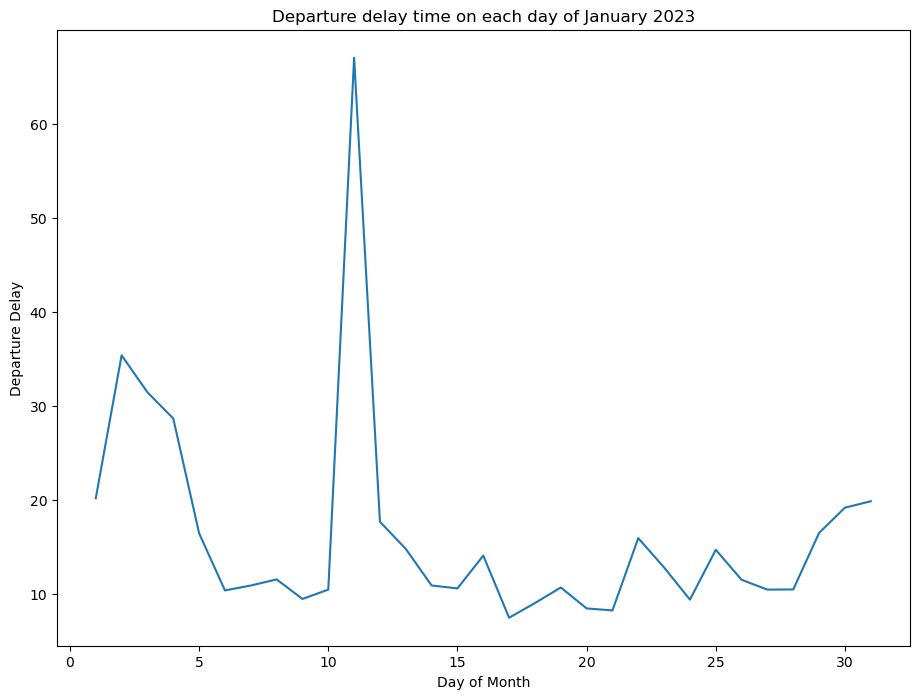

In [45]:
sns.lineplot(data = flight_data_df, x = "DAY_OF_MONTH", y = "DEP_DELAY_NEW", errorbar = None)
plt.title("Departure delay time on each day of January 2023")
plt.ylabel("Departure Delay")
plt.xlabel("Day of Month")
plt.savefig("data/Fig14.png")

In [46]:
flight_data_df.groupby("DAY_OF_MONTH")["DEP_DELAY_NEW"].describe()

,count,mean,std,min,25%,50%,75%,max
DAY_OF_MONTH,,,,,,,,
1,15592.0,20.176437,57.622640,0.0,0.0,0.0,18.0,1561.0
2,17295.0,35.377392,83.474753,0.0,0.0,4.0,37.0,1363.0
3,17024.0,31.440789,86.748363,0.0,0.0,5.0,32.0,2554.0
4,16162.0,28.657530,65.912696,0.0,0.0,2.0,30.0,1471.0
5,16816.0,16.453318,54.120832,0.0,0.0,0.0,13.0,1744.0
6,16997.0,10.372772,37.700914,0.0,0.0,0.0,5.0,1309.0
7,15548.0,10.893941,41.042279,0.0,0.0,0.0,6.0,1481.0
8,17704.0,11.544736,43.386156,0.0,0.0,0.0,8.0,1790.0
9,18115.0,9.469169,43.447039,0.0,0.0,0.0,3.0,1691.0


The highest departure delay time happened in 11th of January with 67 minutes.

In [47]:
flight_data_df["dep_period"] = pd.cut( x = flight_data_df["CRS_DEP_TIME"], bins = [0, 600, 1200, 1800, 2359],\
                           labels = ["Midnight", "Morning", "Afternoon", "Night"])

flight_data_df["arr_period"] = pd.cut( x = flight_data_df["CRS_ARR_TIME"], bins = [0, 600, 1200, 1800, 2359],\
                           labels = ["Midnight", "Morning", "Afternoon", "Night"])

## Delay on each time period of a day

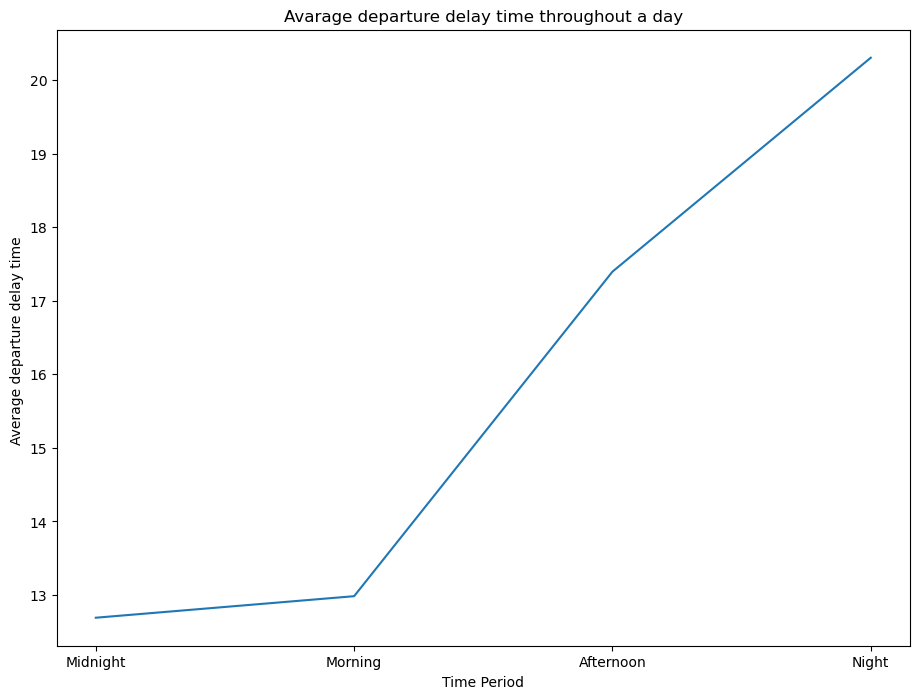

In [48]:
df_dep_delay_period = flight_data_df.groupby("dep_period")['DEP_DELAY_NEW'].describe()
sns.lineplot(data = df_dep_delay_period, x = df_dep_delay_period.index, y = "mean")
plt.title("Avarage departure delay time throughout a day")
plt.ylabel("Average departure delay time ")
plt.xlabel("Time Period")
plt.savefig("data/Fig15.png")

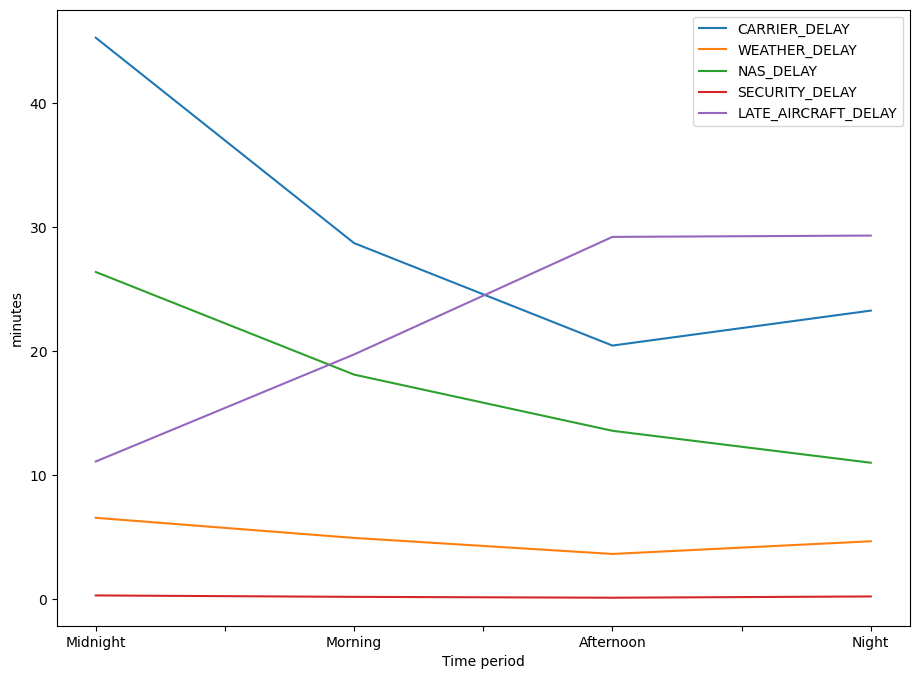

In [49]:
df_delay_kind = flight_data_df[['dep_period', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df_delay_kind.groupby("dep_period").mean().plot()
plt.ylabel("minutes")
plt.xlabel("Time period")
plt.savefig("data/Fig16.png")

## Scatter Plot

C:\Users\Admin\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


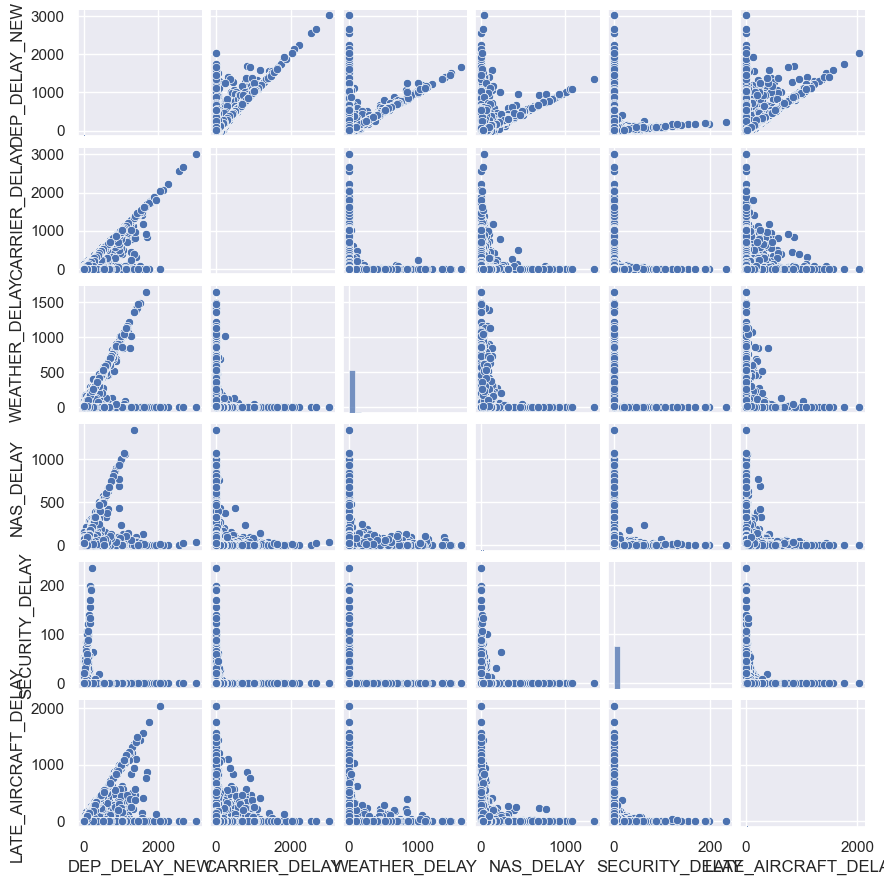

In [50]:
sns.set()
cols = ['DEP_DELAY_NEW','CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
sns.pairplot(flight_data_df[cols], size = 1.5)
plt.savefig("data/Fig17.png")
plt.show()

In examining the pairplot, it becomes evident that Late Aircraft Delay stands out as the most crucial feature. While there isn't a substantial correlation among the different types of delays, a deeper understanding can be gained by exploring the relationship between Arrival Delay and the various delay types.